In [2]:
import requests
html = requests.get("https://ssr1.scrape.center/").text


In [14]:
import requests
from bs4 import BeautifulSoup


In [4]:

import requests

# URL of the website
url = "https://ssr1.scrape.center/"

# User-Agent header
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}

# Sending an HTTP GET request with the specified User-Agent
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Saving the HTML content to a file
    with open("ssr1.html", "w", encoding="utf-8") as f:
        f.write(response.text)
    print("HTML content saved as ssr1.html")
else:
    print("Failed to retrieve HTML content")


HTML content saved as ssr1.html


In [32]:
url = "https://ssr1.scrape.center/"
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, "html.parser")

# 找出每部電影的容器（以 class "el-card" 表示每部電影卡片）
movies = soup.find_all("div", class_="el-card")
print(f"共找到 {len(movies)} 部電影")
first = movies[0]

# 1️⃣ 標題（Title）
title = first.find("h2", class_="m-b-sm").text.strip()

# 2️⃣ 類別（Categories）
categories = [cat.text.strip() for cat in first.find_all("span", class_="category")]

# 3️⃣ 分數（Score）
score = first.find("p", class_="score").text.strip()

# 4️⃣ 詳細頁面連結（可用於 HW3-3 抓更多資訊）
detail_path = first.find("a", class_="name")["href"]
detail_url = "https://ssr1.scrape.center" + detail_path

# Step 3: 進入詳情頁
detail_res = requests.get(detail_url)
detail_soup = BeautifulSoup(detail_res.text, "html.parser")


# 3. 類別（多個分類）
category_tags = first.select('.categories .category span')
categories = ', '.join([c.get_text(strip=True) for c in category_tags])

# 4. 地區與時長（info 區域中的第一個）
info_blocks = first.select('.info')
region_and_duration = info_blocks[0].get_text(strip=True) if len(info_blocks) >= 1 else ''
# 5. 上映日期（info 區域中的第二個）
release_date = info_blocks[1].get_text(strip=True) if len(info_blocks) >= 2 else ''

print("標題：", title)
print("類別列表：", categories)
print("分數：", score)
print("地區與時長：", region_and_duration)
print("上映日期：", release_date)
print("詳情頁面連結：", detail_url)


共找到 10 部電影
標題： 霸王别姬 - Farewell My Concubine
類別列表： 剧情, 爱情
分數： 9.5
地區與時長： 中国内地、中国香港/171 分钟
上映日期： 1993-07-26 上映
詳情頁面連結： https://ssr1.scrape.center/detail/1


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 讀取本地 sample.html
with open("ssr1.html", encoding="utf-8") as f:
    html = f.read()

soup = BeautifulSoup(html, 'html.parser')
movies = []

# 每部電影在 class="el-card item m-t is-hover-shadow" 區塊中
cards = soup.select('.el-card.item')

for card in cards:
    # 1. 標題
    title_tag = card.select_one('a.name h2')
    title = title_tag.get_text(strip=True) if title_tag else ''

    # 2. 分數
    score_tag = card.select_one('.score')
    score = score_tag.get_text(strip=True) if score_tag else ''

    # 3. 類別（多個分類）
    category_tags = card.select('.categories .category span')
    categories = ', '.join([c.get_text(strip=True) for c in category_tags])

    # 4. 地區與時長（info 區域中的第一個）
    info_blocks = card.select('.info')
    region_and_duration = info_blocks[0].get_text(strip=True) if len(info_blocks) >= 1 else ''

    # 5. 上映日期（info 區域中的第二個）
    release_date = info_blocks[1].get_text(strip=True) if len(info_blocks) >= 2 else ''

    # 加入結果
    movies.append({
        'Title': title,
        'Score': score,
        'Categories': categories,
        'Region & Duration': region_and_duration,
        'Release Date': release_date
    })

# 儲存到 Excel
df = pd.DataFrame(movies)
df.to_excel('movies_full.xlsx', index=False)
print("✅ 資料已正確儲存到 movies_full.xlsx")


✅ 資料已正確儲存到 movies_full.xlsx


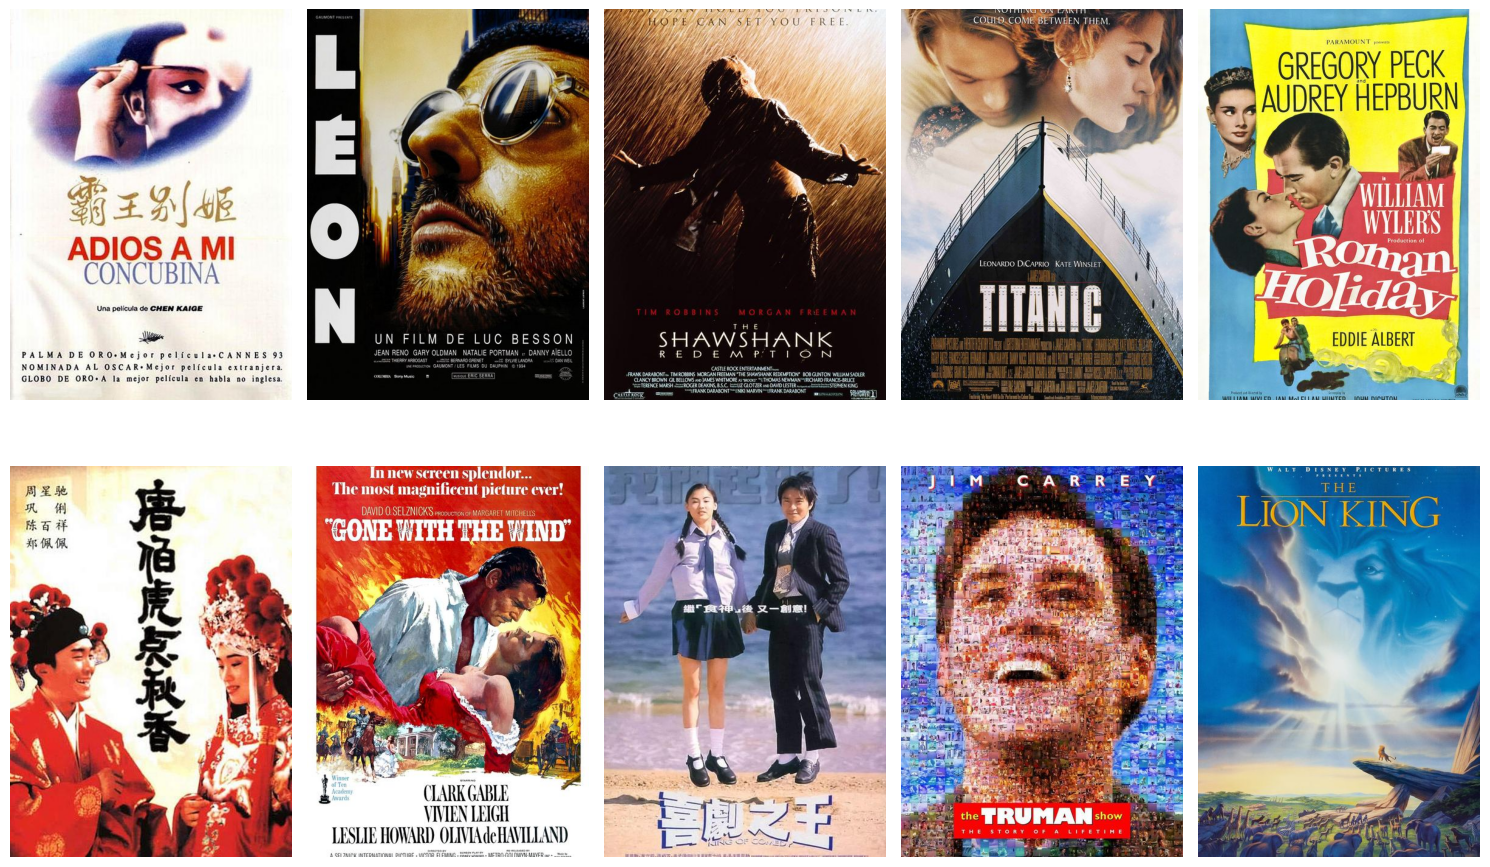

In [9]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Step 1：抓首頁 HTML
url = "https://ssr1.scrape.center/"
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")

# Step 2：取得所有海報 <img> 標籤
img_tags = soup.find_all("img", class_="cover")  # class 可能是 "cover"，視實際網頁為準

# Step 3：依序下載圖片
images = []
for tag in img_tags:
    src = tag["src"]
    if src.startswith("http"):
        img_url = src
    else:
        img_url = "https://ssr1.scrape.center" + src

    # 嘗試下載並讀取圖片
    try:
        img_res = requests.get(img_url)
        img = Image.open(BytesIO(img_res.content))
        images.append(img)
    except Exception as e:
        print("載入失敗：", img_url, e)

# Step 4：顯示圖片（使用 matplotlib）
plt.figure(figsize=(15, 10))
for i, img in enumerate(images):
    plt.subplot(2, 5, i + 1)  # 2行5列
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
from bs4 import BeautifulSoup


In [24]:
import os

# 確保 /mnt/data 資料夾存在
os.makedirs("/mnt/data", exist_ok=True)

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}

# 儲存 1~10 頁為 HTML 檔
for page in range(1, 11):
    url = f"http://ssr1.scrape.center/page/{page}"
    res = requests.get(url, headers=headers)
    with open(f"/mnt/data/page{page}.html", "w", encoding="utf-8") as f:
        f.write(res.text)
    time.sleep(0.5)


In [29]:
from bs4 import BeautifulSoup
import pandas as pd

movies = []

for page in range(1, 11):
    print(f"🔄 正在解析 page{page}.html")
    with open(f"/mnt/data/page{page}.html", "r", encoding="utf-8") as f:
        html = f.read()
    soup = BeautifulSoup(html, 'html.parser')

    for card in soup.select('.el-card.item'):
        title = card.select_one('a.name h2').get_text(strip=True)
        score = card.select_one('.score').get_text(strip=True)

        category_tags = card.select('.categories .category span')
        categories = ', '.join([c.get_text(strip=True) for c in category_tags])

        info_tags = card.select('.info')
        region_duration = info_tags[0].get_text(strip=True) if len(info_tags) > 0 else ''
        release_date = info_tags[1].get_text(strip=True) if len(info_tags) > 1 else ''

        movies.append({
            'Title': title,
            'Score': score,
            'Categories': categories,
            'Region_Duration': region_duration,
            'Release_Date': release_date
        })

df = pd.DataFrame(movies)

# 儲存成 Excel
df.to_excel("/mnt/data/movie_info_from_10pages.xlsx", index=False)

# 或儲存成 CSV
df.to_csv("/mnt/data/movie_info_from_10pages.csv", index=False, encoding="utf-8-sig")

print("✅ 成功從本地 HTML 抽取資料並輸出成 Excel / CSV")


🔄 正在解析 page1.html
🔄 正在解析 page2.html
🔄 正在解析 page3.html
🔄 正在解析 page4.html
🔄 正在解析 page5.html
🔄 正在解析 page6.html
🔄 正在解析 page7.html
🔄 正在解析 page8.html
🔄 正在解析 page9.html
🔄 正在解析 page10.html
✅ 成功從本地 HTML 抽取資料並輸出成 Excel / CSV
